# MultiArmedBandit Using Normal Epsilon Greedy

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import random

In [60]:
TRIALS_NUMBER = 2000
EPS = 0.1 # 0.1 -> Random Behavior | 0.9 -> Greedy Behavior
SLOT_MACHINES_SPECS = [[1.5,3,2],[6,6,2],[11.35,10,2]] # [p, mu, sigma]
SLOT_MACHINES_PROBABILITIES = [0.2,0.5,0.75] # Calculated probability of happening the p numbers or less in the normal dist

In [61]:
class Slot:
    def __init__(self, p, mu, sigma):
        self.p = p
        self.N = 0
        self.p_estimate = 0
        self.mu = mu
        self.sigma = sigma
    def pull_the_handle(self):
        # if random value is less than p the reward is 1.Else Reward is 0.
        return np.random.normal(self.mu, self.sigma) < self.p
    
    def update(self, R):
        self.N += 1
        self.p_estimate = (   R   +    (self.N - 1)*self.p_estimate    ) / self.N

In [73]:
def solveByMultiArmedBandit_EGreedy_Normal():
    slot_machines = [Slot(s[0],s[1],s[2]) for s in SLOT_MACHINES_SPECS]
    rewards = np.zeros(TRIALS_NUMBER)
    num_times_explored = 0
    num_times_exploited = 0
    num_optimal = 0
    optimal_slot_machine_index = np.argmax([slot.p for slot in slot_machines])
    
    for i in range(TRIALS_NUMBER):
        if np.random.random() < EPS :
            # EXPLORE - Random Behavior
            num_times_explored += 1
            random_picked_machine_index = np.random.randint(len(slot_machines))
        else:
            # EXPLOIT - Greedy Behavior
            num_times_exploited += 1
            random_picked_machine_index = np.argmax([slot.p_estimate for slot in slot_machines])
        
        if random_picked_machine_index == optimal_slot_machine_index:
            num_optimal += 1
        
        R = slot_machines[random_picked_machine_index].pull_the_handle()
        rewards[i] = R
        slot_machines[random_picked_machine_index].update(R)
        
    for s in slot_machines:
        print("mean_estimate:", s.p_estimate)
        
    print("Total Rewards Earned : ", rewards.sum())
    print("Overall Win Rate : ", rewards.sum() / TRIALS_NUMBER)
    print("Number of times explored : ", num_times_explored)
    print("Number of times exploited : ", num_times_exploited)
    print("Number of times optimal slot machines selected : ", num_optimal)
    
    cumulative_results = np.cumsum(rewards)
    win_rates = cumulative_results / (np.arange(TRIALS_NUMBER) + 1)
    plt.plot(win_rates)
    plt.plot(np.ones(TRIALS_NUMBER)*np.max(SLOT_MACHINES_PROBABILITIES))
    plt.show()

mean_estimate: 0.19444444444444445
mean_estimate: 0.4189189189189189
mean_estimate: 0.7491909385113269
Total Rewards Earned :  1434.0
Overall Win Rate :  0.717
Number of times explored :  202
Number of times exploited :  1798
Number of times optimal slot machines selected :  1854


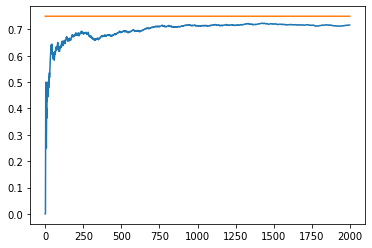

In [74]:
solveByMultiArmedBandit_EGreedy_Normal()

# MultiArmedBandit Using UCB

In [77]:
TRIALS_NUMBER = 2000
EPS = 0.1 # 0.1 -> Random Behavior | 0.9 -> Greedy Behavior
SLOT_MACHINES_SPECS = [[1.5,3,2],[6,6,2],[11.35,10,2]] # [p, mu, sigma]
SLOT_MACHINES_PROBABILITIES = [0.2,0.5,0.75] # Calculated probability of happening the p numbers or less in the normal dist

In [78]:
class Slot:
    def __init__(self, p, mu, sigma):
        self.p = p
        self.N = 0
        self.p_estimate = 0
        self.mu = mu
        self.sigma = sigma
    def pull_the_handle(self):
        # if random value is less than p the reward is 1.Else Reward is 0.
        return np.random.normal(self.mu, self.sigma) < self.p
    
    def update(self, R):
        self.N += 1
        self.p_estimate = (   R   +    (self.N - 1)*self.p_estimate    ) / self.N

In [85]:
def solveByMultiArmedBandit_UCB_Normal():
    C_UCB = 0.2
    slot_machines = [Slot(s[0],s[1],s[2]) for s in SLOT_MACHINES_SPECS]
    rewards = np.zeros(TRIALS_NUMBER)
    for i in range(TRIALS_NUMBER):
        # UCB
        picked_machine_index = np.argmax([(slot.p_estimate + C_UCB*(np.log(i)/slot.N)**0.5) for slot in slot_machines])
        R = slot_machines[picked_machine_index].pull_the_handle()
        rewards[i] = R
        slot_machines[picked_machine_index].update(R)
        
    for s in slot_machines:
        print("mean_estimate:", s.p_estimate)
        
    print("Total Rewards Earned : ", rewards.sum())
    print("Overall Win Rate : ", rewards.sum() / TRIALS_NUMBER)
    
    selected_times = [s.N for s in slot_machines]
    print(selected_times)
    
    cumulative_results = np.cumsum(rewards)
    win_rates = cumulative_results / (np.arange(TRIALS_NUMBER) + 1)
    plt.plot(win_rates)
    plt.plot(np.ones(TRIALS_NUMBER)*np.max(SLOT_MACHINES_PROBABILITIES))
    plt.show()

mean_estimate: 0.0
mean_estimate: 0.4
mean_estimate: 0.7497492477432297
Total Rewards Earned :  1497.0
Overall Win Rate :  0.7485
[1, 5, 1994]


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log
  
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in double_scalars
  
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in double_scalars
  


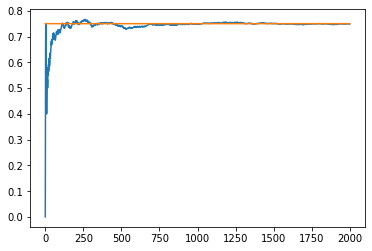

In [86]:
solveByMultiArmedBandit_UCB_Normal()